# Heart Disease Prediction Using Machine Learning
This notebook focuses on data cleaning and preprocessing.


## 1. Import Required Libraries

In this step, we import Python libraries that are required for data manipulation,
visualization, and machine learning.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## 2. Load the Dataset

In this step, we load the heart disease dataset from a CSV file
into a Pandas DataFrame.


In [2]:
df = pd.read_csv("../data/heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


## 3. Data Cleaning – Handling Missing Values

Real world healthcare datasets often contain missing values.
In this step, we identify and handle missing data to improve model performance.


In [3]:
df.isnull().sum()


Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

### Why Missing Values Matter

Missing values can:
- Reduce model accuracy
- Cause training errors
- Bias predictions

Therefore, handling missing data is a very critical preprocessing step.


In [18]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())



In [5]:
df.isnull().sum()


Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

## 4. Exploratory Data Analysis

Exploratory Data Analysis helps understand patterns, relationships,
and any potential risk factors related to heart disease before modeling.


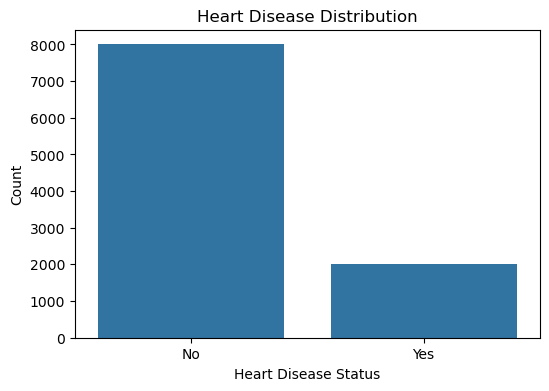

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Heart Disease Status', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")
plt.show()


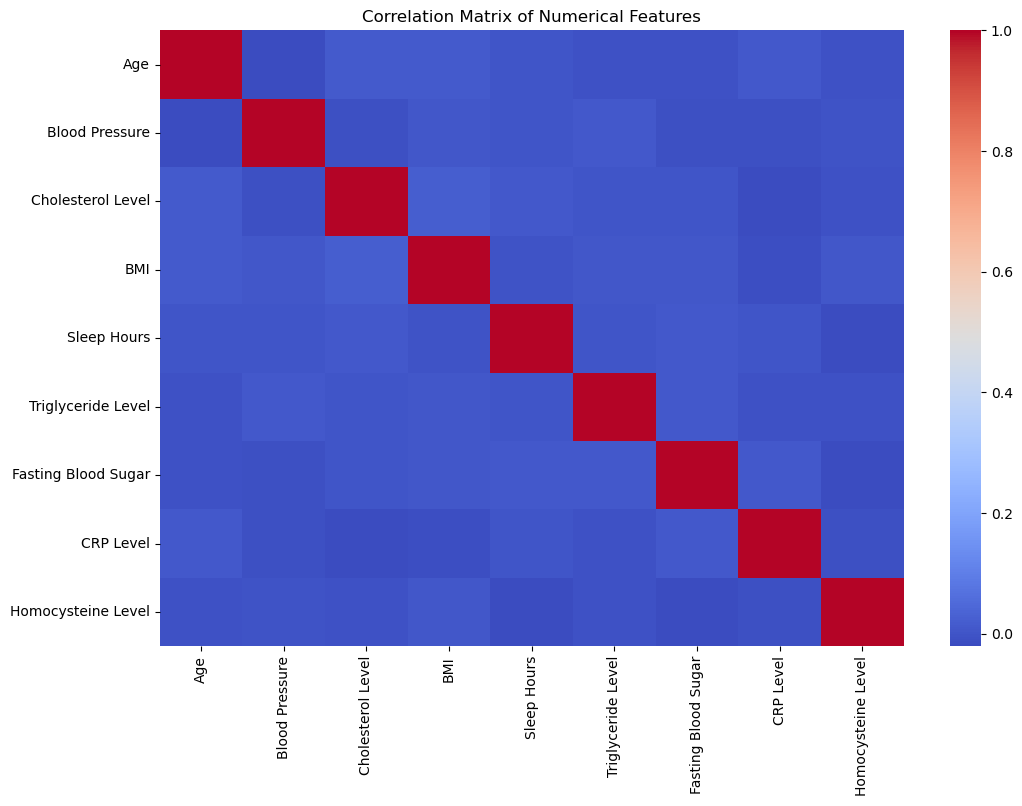

In [7]:
plt.figure(figsize=(12,8))
corr_matrix = df.select_dtypes(include=np.number).corr()

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Key Observations from Exploratory Data Analysis

- Certain medical features show stronger correlation with heart disease.
- The target variable distribution provides insight into class balance.
- Correlation analysis helps identify influential risk factors.


## 5. Feature Encoding

Machine learning models require numerical input.
In this step, categorical variables are converted into numerical format.


In [8]:
df.select_dtypes(include='object').columns


Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [10]:
df.head()


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,0,1,1,0,24.991591,1,...,0,0,2,7.633228,2,342.0,120.0,12.969246,12.387250,0
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,...,0,2,0,8.744034,2,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,...,1,1,1,4.440440,1,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,...,1,1,0,5.249405,0,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,...,0,1,0,7.030971,0,263.0,154.0,10.381259,8.153887,0


## 6. Train-Test Split

To evaluate the model fairly, the dataset is split into
training and testing sets.


In [11]:
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)
print("Target distribution (train):")
print(y_train.value_counts(normalize=True))


Train shapes: (8000, 20) (8000,)
Test shapes: (2000, 20) (2000,)
Target distribution (train):
Heart Disease Status
0    0.8
1    0.2
Name: proportion, dtype: float64


## 7. Model Training

In this step, a Random Forest classifier is trained
to predict the presence of heart disease.


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
print("Model trained ✅")



Model trained ✅


## 8. Model Predictive Evaluation

The trained model is evaluated using test data
to assess its predictive performance.


In [14]:
y_pred = model.predict(X_test)




Accuracy: 0.8

Classification Report:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



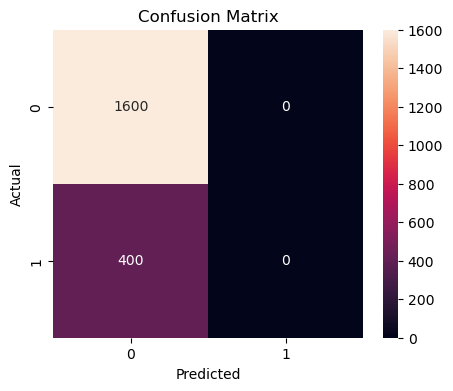

In [15]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## 9. Model Training
Train a machine learning model using the prepared training data.

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


## 12. Saving the Model


In [17]:
import joblib

joblib.dump(model, "../model/heart_disease_model.pkl")
joblib.dump(list(X.columns), "../model/feature_columns.pkl")

print("Model and feature columns saved successfully")


Model and feature columns saved successfully


## Conclusion

In this project, I developed a machine learning model to predict heart disease
using real-world healthcare data. The dataset was cleaned and analyzed before training a Random Forest classifier.

Exploratory data analysis revealed key relationships between medical features
and heart disease. Model evaluation highlighted the importance of handling
class imbalance in healthcare datasets.

